# Scotch Whiskies Expoloratory Data Analysis
#### This Jupyter Notebook goes through the cleaning, data visualization, and beginning clustering procedure for data analysis of the data set

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Import the Data from a csv file

In [2]:
scotch_df = pd.read_csv('Scotch.csv')

### Start Cleaning the Data

In [3]:
# Remove DISTRICT variable from dataset for now
scotch_df.drop(['DISTRICT'], axis = 1, inplace = True, errors = 'ignore')

In [4]:
scotch_df.drop(['NAME_2','DIST','REGION','islay','midland','spey','east','west','north ','lowland','campbell','islands'], axis = 1, inplace = True, errors = 'ignore')
print scotch_df.columns.values
print scotch_df.head(10)

['NAME_1' 'color_wyne' 'color_yellow' 'color_v.pale' 'color_pale'
 'color_p.gold' 'color_gold' 'color_o.gold' 'color_f.gold' 'color_bronze'
 'color_p.amber' 'color_amber' 'color_f.amber' 'color_red' 'color_sherry'
 'NOSE_AROMA' 'NOSE_PEAT' 'NOSE_SWEET' 'NOSE_LIGHT' 'NOSE_FRESH' 'NOSE_DRY'
 'NOSE_FRUIT' 'NOSE_GRASS' 'NOSE_SEA' 'NOSE_SHERRY' 'NOSE_SPICY'
 'NOSE_RICH' 'BODY_soft' 'BODY_med' 'BODY_full' 'BODY_round' 'BODY_smooth'
 'BODY_light' 'BODY_firm' 'BODY_oily' 'PAL_full' 'PAL_dry' 'PAL_sherry'
 'PAL_big' 'PAL_light' 'PAL_smooth' 'PAL_clean' 'PAL_fruit' 'PAL_grass'
 'PAL_smoke' 'PAL_sweet' 'PAL_spice' 'PAL_oil' 'PAL_salt' 'PAL_arome'
 'FIN_full' 'FIN_dry' 'FIN_warm' 'FIN_big' 'FIN_light' 'FIN_smooth'
 'FIN_clean' 'FIN_fruit' 'FIN_grass' 'FIN_smoke' 'FIN_sweet' 'FIN_spice'
 'FIN_oil' 'FIN_salt' 'FIN_arome' 'FIN_ling' 'FIN_long' 'FIN_very'
 'FIN_quick' 'AGE' 'SCORE' '%']
         NAME_1  color_wyne  color_yellow  color_v.pale  color_pale  \
0     Aberfeldy         0.0           1.0    

In [5]:
scotch_df.dropna(inplace = True)
print scotch_df.isnull().sum()

NAME_1           0
color_wyne       0
color_yellow     0
color_v.pale     0
color_pale       0
color_p.gold     0
color_gold       0
color_o.gold     0
color_f.gold     0
color_bronze     0
color_p.amber    0
color_amber      0
color_f.amber    0
color_red        0
color_sherry     0
NOSE_AROMA       0
NOSE_PEAT        0
NOSE_SWEET       0
NOSE_LIGHT       0
NOSE_FRESH       0
NOSE_DRY         0
NOSE_FRUIT       0
NOSE_GRASS       0
NOSE_SEA         0
NOSE_SHERRY      0
NOSE_SPICY       0
NOSE_RICH        0
BODY_soft        0
BODY_med         0
BODY_full        0
                ..
PAL_fruit        0
PAL_grass        0
PAL_smoke        0
PAL_sweet        0
PAL_spice        0
PAL_oil          0
PAL_salt         0
PAL_arome        0
FIN_full         0
FIN_dry          0
FIN_warm         0
FIN_big          0
FIN_light        0
FIN_smooth       0
FIN_clean        0
FIN_fruit        0
FIN_grass        0
FIN_smoke        0
FIN_sweet        0
FIN_spice        0
FIN_oil          0
FIN_salt    

### Create Numpy Array and Start Clustering Procedure

In [6]:
scotch_nparr = np.array(scotch_df.iloc[:,1:])

In [7]:
# Initialize and carry out clustering
starting_number_of_clusters = 2
ending_number_of_clusters = 10

# Model the data and create the centroids
k_range = range(starting_number_of_clusters, ending_number_of_clusters + 1)
km = [KMeans(n_clusters = k).fit(scotch_nparr) for k in k_range]
centroids = [X.cluster_centers_ for X in km] # List of lists of centroids

In [8]:
# For every point in the data set, calculate the eclidean distance from the points to the centroids
k_euclid = [distance.cdist(scotch_nparr, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [9]:
# Centroids in a list of list of centroids of which are defined by 71 variables
print "There are %d different K's being tried." % len(k_range)
print ["%d Centroids" % len(centroids[i]) for i in range(0,len(k_range))]

# k_euclid[0] returns a distance matrix where each M[i,j] is the distance from the i-th
# sample point to the j-th centroid. k_euclid contains len(k_range) number of distance
# matricies
print np.shape(k_euclid[0])
print np.shape(k_euclid[1])
print np.shape(k_euclid[2])


# For all the samples (rows) in the matrix, find the cluster-distance (column) that has the min distance
# and return the distance
print len(dist[0])
print np.shape(dist[0])
print np.shape(dist)

There are 9 different K's being tried.
['2 Centroids', '3 Centroids', '4 Centroids', '5 Centroids', '6 Centroids', '7 Centroids', '8 Centroids', '9 Centroids', '10 Centroids']
(109, 2)
(109, 3)
(109, 4)
109
(109,)
(9, 109)


In [10]:
# Same as the Within-Cluster Sum of Squares
print [X.inertia_ for X in km]

[6517.2682845345353, 4490.3739419419417, 3639.9492675792676, 2849.9897727272728, 2586.3022619047615, 2353.2462677527146, 2132.7524122807017, 1969.0634722222221, 1838.4781346153845]


In [11]:
# Within-Cluster Sum of Squares
wcss = [sum(d**2) for d in dist]
print wcss

[6517.2682845345344, 4490.3739419419417, 3639.9492675792667, 2849.9897727272723, 2586.3022619047611, 2353.2462677527142, 2132.7524122807022, 1969.0634722222217, 1838.4781346153848]


In [12]:
# Total Sum of Squares
tss = sum(distance.pdist(scotch_nparr)**2 / scotch_nparr.shape[0])
print tss

17346.2543119


In [13]:
# Between-Cluster Sum of Squares
bss = tss - wcss
print bss

[ 10828.98602739  12855.88036998  13706.30504435  14496.2645392
  14759.95205002  14993.00804417  15213.50189965  15377.1908397
  15507.77617731]


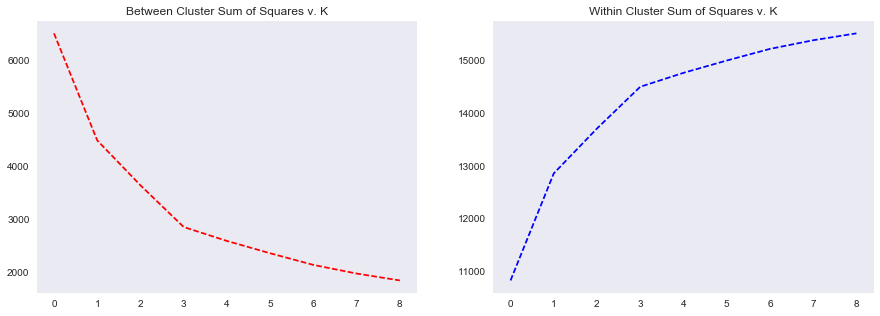

In [14]:
plt.figure(num = 1, figsize = (15,5))
plt.subplot(121)
plt.title('Between Cluster Sum of Squares v. K')
plt.grid(False)
plt.plot(wcss, 'r--')
plt.subplot(122)
plt.title('Within Cluster Sum of Squares v. K')
plt.grid(False)
plt.plot(bss, 'b--')
plt.show()

## Understand the Elbow Method
"Then, plot a line chart of the SSE for each value of k. 
If the line chart looks like an arm, then the "elbow" on the 
arm is the value of k that is the best. The idea is that we 
want a small SSE, but that the SSE tends to decrease toward 0 as 
we increase k (the SSE is 0 when k is equal to the number of data 
points in the dataset, because then each data point 
is its own cluster, and there is no error between it 
and the center of its cluster). So our goal is to 
choose a small value of k that still has a low SSE, and the elbow 
usually represents where we start to have diminishing returns by increasing k."
https://bl.ocks.org/rpgove/0060ff3b656618e9136b

In [15]:
# Print the label/cluster assignment to each of the samples
print len([L.labels_ for L in km][0])
print [L.labels_ for L in km]

109
[array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int32), array([1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int32), array([0, 2, 2, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 3, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 1, 1, 1, 2, 1, 3, 1, 0, 1, 2, 0,
       1, 3, 

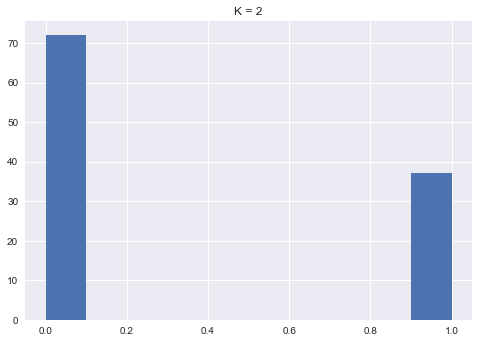

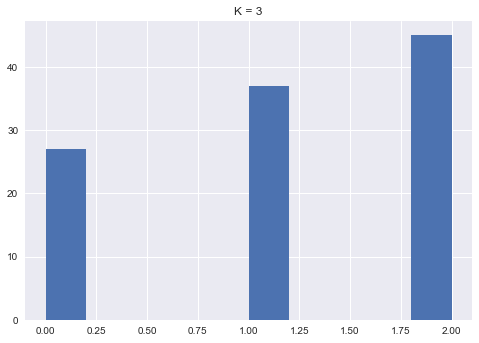

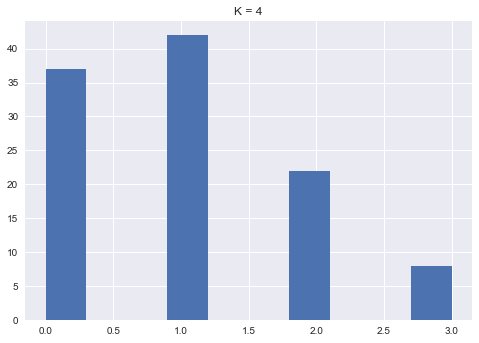

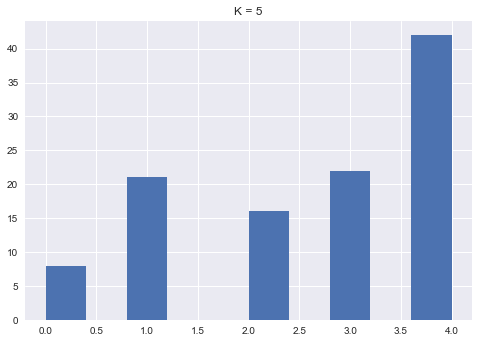

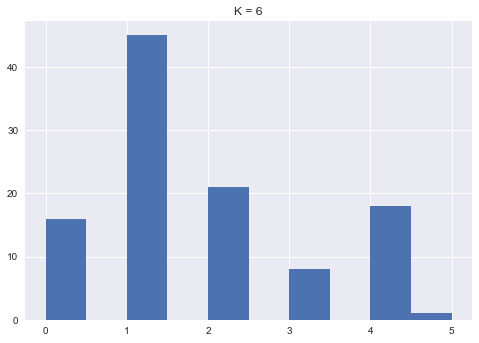

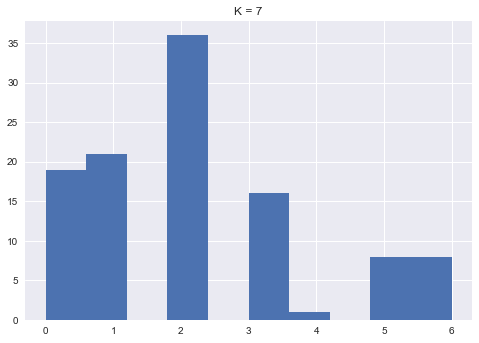

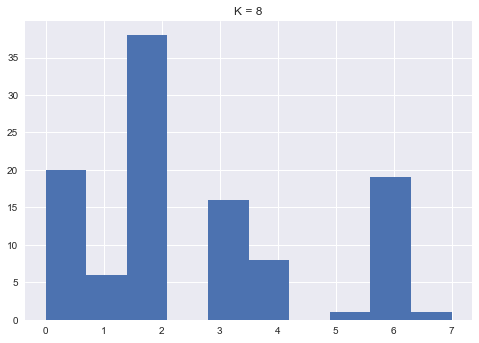

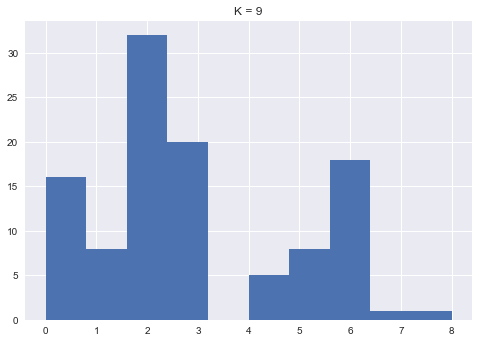

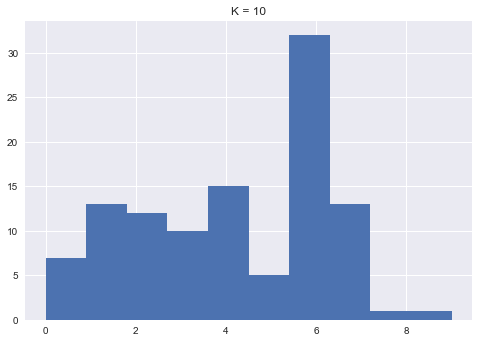

In [16]:
k_label = 2
for H in km:
    plt.figure()
    plt.title('K = %d' % k_label)
    k_label += 1
    plt.hist([H.labels_][0])
    plt.show()

In [17]:
k_label = 2
k_df = pd.DataFrame()
for H in km:
    col_name = "K%d" % k_label
    k_label += 1
    k_df[col_name] = H.labels_
k_df

,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,1,1,0,1,2,1,0,3,7
1,0,0,2,3,4,0,6,6,2
2,0,0,2,3,4,0,6,6,4
3,0,2,3,0,3,5,4,4,5
4,0,0,2,3,4,0,6,6,4
5,0,2,1,4,1,2,2,2,6
6,0,2,1,4,1,2,2,2,6
7,1,1,0,1,2,1,0,3,7
8,1,1,0,2,0,3,3,0,1
9,1,1,0,1,2,1,0,3,3


In [18]:
comb_df = scotch_df.join(k_df)
comb_df.head(10)

,NAME_1,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,%,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1,1,0,1,2,1,0,3,7
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0,0,2,3,4,0,6,6,2
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0,0,2,3,4,0,6,6,4
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46.0,0,2,3,0,3,5,4,4,5
4,Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0,0,2,3,4,0,6,6,4
5,Aultmore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0,2,1,4,1,2,2,2,6
6,Balblair,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0,2,1,4,1,2,2,2,6
7,Balmenach,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,1,1,0,1,2,1,0,3,7
8,Balvenie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1,1,0,2,0,3,3,0,1
9,Banff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,40.0,1,1,0,1,2,1,0,3,3


In [19]:
feature_cols = comb_df.columns.values[1:69]
print feature_cols

['color_wyne' 'color_yellow' 'color_v.pale' 'color_pale' 'color_p.gold'
 'color_gold' 'color_o.gold' 'color_f.gold' 'color_bronze' 'color_p.amber'
 'color_amber' 'color_f.amber' 'color_red' 'color_sherry' 'NOSE_AROMA'
 'NOSE_PEAT' 'NOSE_SWEET' 'NOSE_LIGHT' 'NOSE_FRESH' 'NOSE_DRY' 'NOSE_FRUIT'
 'NOSE_GRASS' 'NOSE_SEA' 'NOSE_SHERRY' 'NOSE_SPICY' 'NOSE_RICH' 'BODY_soft'
 'BODY_med' 'BODY_full' 'BODY_round' 'BODY_smooth' 'BODY_light' 'BODY_firm'
 'BODY_oily' 'PAL_full' 'PAL_dry' 'PAL_sherry' 'PAL_big' 'PAL_light'
 'PAL_smooth' 'PAL_clean' 'PAL_fruit' 'PAL_grass' 'PAL_smoke' 'PAL_sweet'
 'PAL_spice' 'PAL_oil' 'PAL_salt' 'PAL_arome' 'FIN_full' 'FIN_dry'
 'FIN_warm' 'FIN_big' 'FIN_light' 'FIN_smooth' 'FIN_clean' 'FIN_fruit'
 'FIN_grass' 'FIN_smoke' 'FIN_sweet' 'FIN_spice' 'FIN_oil' 'FIN_salt'
 'FIN_arome' 'FIN_ling' 'FIN_long' 'FIN_very' 'FIN_quick']


### Take a look at how the features are distributed amongst the different kinds of Scotches

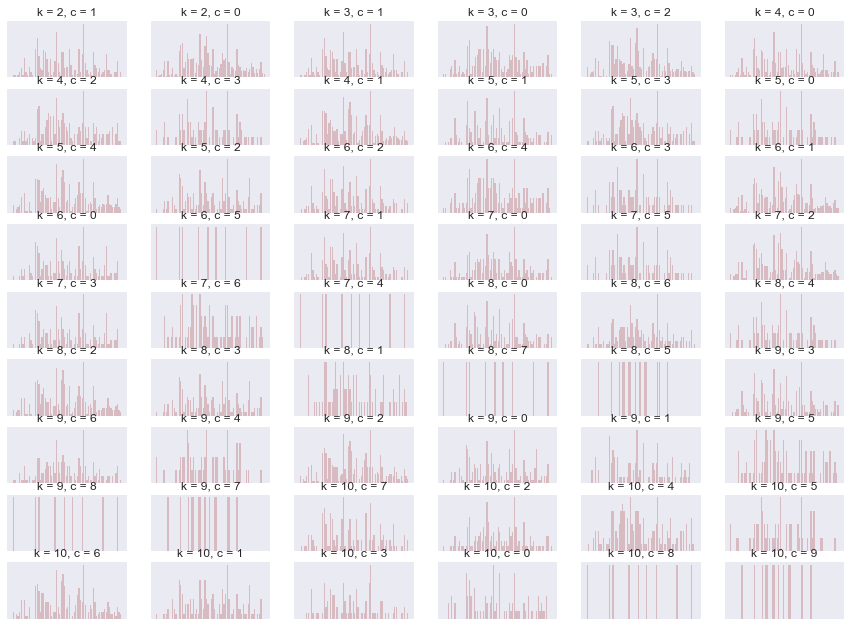

In [20]:
plt.figure(num = 1, figsize = (15,11))

# labels = [i for i in comb_df['K2']]
# labels = labels[:68]
# colors = ['red','blue']
# colors_list = [colors[i] for i in labels]

opacity = 0.2

i = 1
for k in k_range:
    col_index = "K%d" % k
    unique_clusters = comb_df[col_index].unique()
    for c in unique_clusters:
        plt.subplot(9,6,i)
        i += 1
        
        plt.title("k = %d, c = %d" % (k, c))
        plt.bar(range(68), comb_df[comb_df[col_index] == c][feature_cols].sum(), color = 'darkred', alpha = opacity)
#         plt.bar(range(68), comb_df[comb_df[col_index] == c][feature_cols].sum(), color = colors_list, alpha = opacity)
        plt.xticks([])
        plt.yticks([])
plt.show()
        

In [21]:
cluster_list = []
for k in k_range:
    col_index = "K%d" % k
    unique_clusters = comb_df[col_index].unique()
    l = []
    for c in unique_clusters:
        print "[K = %d, C = %d]" % (k, c)
        l.append(comb_df[comb_df[col_index] == c][feature_cols].sum())
#         print comb_df[comb_df[col_index] == c][feature_cols].columns.values
    cluster_list.append(l)

[K = 2, C = 1]
[K = 2, C = 0]
[K = 3, C = 1]
[K = 3, C = 0]
[K = 3, C = 2]
[K = 4, C = 0]
[K = 4, C = 2]
[K = 4, C = 3]
[K = 4, C = 1]
[K = 5, C = 1]
[K = 5, C = 3]
[K = 5, C = 0]
[K = 5, C = 4]
[K = 5, C = 2]
[K = 6, C = 2]
[K = 6, C = 4]
[K = 6, C = 3]
[K = 6, C = 1]
[K = 6, C = 0]
[K = 6, C = 5]
[K = 7, C = 1]
[K = 7, C = 0]
[K = 7, C = 5]
[K = 7, C = 2]
[K = 7, C = 3]
[K = 7, C = 6]
[K = 7, C = 4]
[K = 8, C = 0]
[K = 8, C = 6]
[K = 8, C = 4]
[K = 8, C = 2]
[K = 8, C = 3]
[K = 8, C = 1]
[K = 8, C = 7]
[K = 8, C = 5]
[K = 9, C = 3]
[K = 9, C = 6]
[K = 9, C = 4]
[K = 9, C = 2]
[K = 9, C = 0]
[K = 9, C = 1]
[K = 9, C = 5]
[K = 9, C = 8]
[K = 9, C = 7]
[K = 10, C = 7]
[K = 10, C = 2]
[K = 10, C = 4]
[K = 10, C = 5]
[K = 10, C = 6]
[K = 10, C = 1]
[K = 10, C = 3]
[K = 10, C = 0]
[K = 10, C = 8]
[K = 10, C = 9]


### Look at top {num_flavors} flavors for {num_clusters} number of K-Mean clusters

In [79]:
# Between 1 and 9
num_clusters = 4
# Between 0 and 68
num_flavors = 7

print [cluster_list[i][1].sort_values(ascending = False)[:num_flavors] for i in range(num_clusters)]

[255.0, 91.0, 75.0, 75.0]


# Choose a k-value from 1 - 10 below:

In [77]:
k = 2

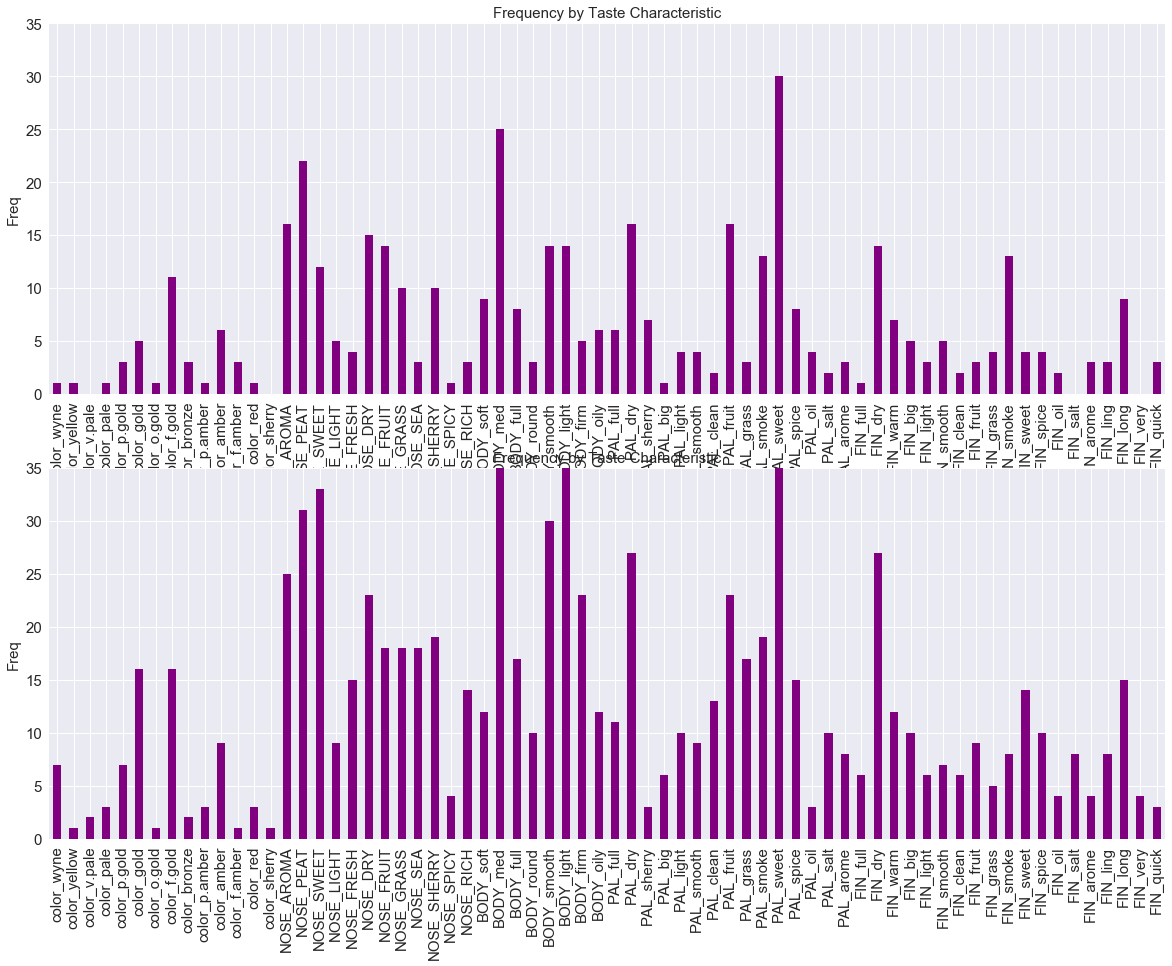

72 Scotches in cluster #1 --- 66.06%
-----------------------------------------------
37 Scotches in cluster #2 --- 33.94%
-----------------------------------------------


In [78]:
plt.figure(num = 1, figsize = (20,15))

for i in range(k):
    plt.subplot(k,1,i + 1)
    plt.ylabel('Freq', fontsize = 15)
    plt.title('Frequency by Taste Characteristic', fontsize = 15)
    plt.ylim(0,35)
    cluster_list[k - 2][i].plot(kind = 'bar', color = 'purple', fontsize = 15)
    
plt.show()

for j in range(k):
    len_scotches = len(comb_df['NAME_1'][comb_df['K%d' % k] == j])
    perc = (len_scotches / float(len(comb_df['NAME_1']))) * 100.00
    print str(len_scotches) + ' Scotches in cluster #%d' % (j + 1) + " --- %.2f%%" % perc
    print '-----------------------------------------------'